### Inserting the Necessary Libraries. 
### Numpy and pandas for preprocessing the dataset.
### Seaborn for the visualization
### Graphiz for the decision tree visualization.

In [83]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
# Importing the dataset
#Quoting=3 used for  ignoring the double quotes.
df = pd.read_csv('C:/Users/Aditya/Downloads/Natural-Language-Processing/Natural_Language_Processing/Restaurant_Reviews.tsv', delimiter = '\t', quoting=3)


### This code is used to display the first 5 rows and all the attributes of the dataset 

In [84]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### A new column is added to the dataset  that will store the lenght of the string calculated. 

In [85]:
df['text length'] = df['Review'].apply(len)
df.head()

,Review,Liked,text length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


### This code is used for vizualization. The seaborn library is called here and a histogram is plotted. There are two histograms as there are two classes in the dataset.

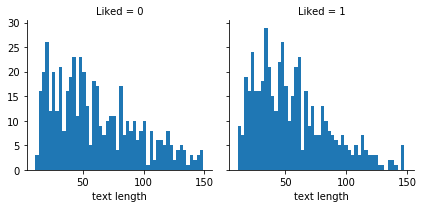

In [86]:
g = sns.FacetGrid(data=df, col='Liked')
g.map(plt.hist, 'text length', bins=50)

### The Box is vizualized here for two classes available, The X axis will be the class and the Y axis will be the Text length.

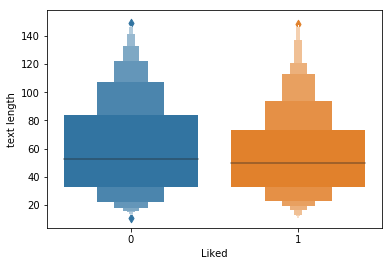

In [87]:
sns.boxenplot(x='Liked', y='text length', data=df)

### The nltk packgae is imported and the stopwords package is downloaded. The PortStemmer and the Stopwords libraries will help us clean the dataset. 

In [88]:
import re # Libraries for text cleaning
import nltk
nltk.download('stopwords')# downlaoding the package.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### A corpus file is created with the help of  PorterStemmer, Stopwords  and only selecting characters from A-Z  including spaces. 

In [89]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
corpus[4]

'select menu great price'

### With the help of the sklearn library and CountVectorize the attribute reviews can be vectorized.   

### The classifiers  can only be applied once the string is converted to vectors. This is a pre requisite  for sklearn classifiers. 

### Once the column "review" is converted to vectors the target value and the input values are selected. 

### The next step is to split the dataset into testing and training dataset. 

### The first classifier that will be used to check the accuracy score is the Gaussian NaiveBayes. This classifier can be used by importing the naive bayes module from sklearn. 

### The confusion matrix and the classification report will also be needed to know if the classifier is suited for the dataset.


In [90]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 50)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
print(cm)
print(classifier.score(X_test,y_test))

             precision    recall  f1-score   support

          0       0.86      0.48      0.61       105
          1       0.61      0.92      0.73        95

avg / total       0.74      0.69      0.67       200

[[50 55]
 [ 8 87]]
0.685


### Logistic Regression algorithm.  Here the test and train data are spilt into 30% and 70% respectively.  value logreg is assigned to LogisticRegression(). THe logreg will be used to get the output of the accuracy score, the classification report and the confusion matrix

In [91]:
from sklearn.linear_model import LogisticRegression
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=45)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)
print(logreg.score(X_test,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7466666666666667
[[113  27]
 [ 49 111]]
             precision    recall  f1-score   support

          0       0.70      0.81      0.75       140
          1       0.80      0.69      0.74       160

avg / total       0.75      0.75      0.75       300



### From sklearn LinearSVC model is imported. 

In [92]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
clf = LinearSVC(random_state=42, tol=1e-5)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=1e-05,
     verbose=0)

### Accuracy score for LinearSVC model

In [93]:
y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))
print( y_pred)

y_pred.size

0.75
[0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0
 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0
 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1]


300

### Confusion matrix

In [94]:
print(confusion_matrix(y_test, y_pred))

[[108  32]
 [ 43 117]]


### Clasification report.

In [95]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.77      0.74       140
          1       0.79      0.73      0.76       160

avg / total       0.75      0.75      0.75       300



### DecisionTree Classifier. 

### Accuracy score for classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = dt.predict(X_test)
print(dt.score(X_test,y_test))
print(y_pred)

0.7066666666666667
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0]


### Confision matrix and Classification Report

In [97]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[120  20]
 [ 68  92]]
             precision    recall  f1-score   support

          0       0.64      0.86      0.73       140
          1       0.82      0.57      0.68       160

avg / total       0.74      0.71      0.70       300



### Display the tree. The max_depth is set to '5' for a smaller visualization.

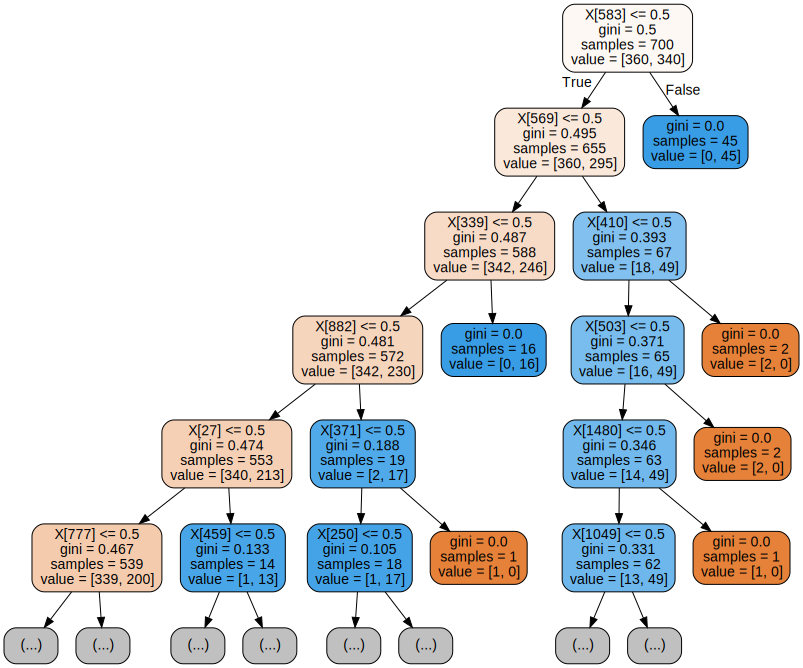

In [99]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
Source( tree.export_graphviz(dt, out_file=None, filled = True))
graph = Source( tree.export_graphviz(dt, out_file=None, filled = True, max_depth= 5, rounded= True))
SVG(graph.pipe(format='svg'))